In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# 1. Data Cleaning and Preparation:

In [173]:
# Load the dataset into a data frame or equivalent data structure.

df1 = pd.read_csv('Cardiotocographic.csv')
df1

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [174]:
# Handle missing values appropriately (e.g., imputation, deletion).

df1.isnull().sum() # Showing that some missing values existed.

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [175]:
# Why drop ? 
# Our datset shape is 2126 rows × 14 columns. and very less missing values existed. so droping rows is best choice.

df2 = df1.dropna()
df2.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [176]:
# Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

df2.info() # Founds that all data types are stored in numerical values only. so no changes required.

<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2105 non-null   float64
 2   FM        2105 non-null   float64
 3   UC        2105 non-null   float64
 4   DL        2105 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2105 non-null   float64
 8   MSTV      2105 non-null   float64
 9   ALTV      2105 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 246.7 KB


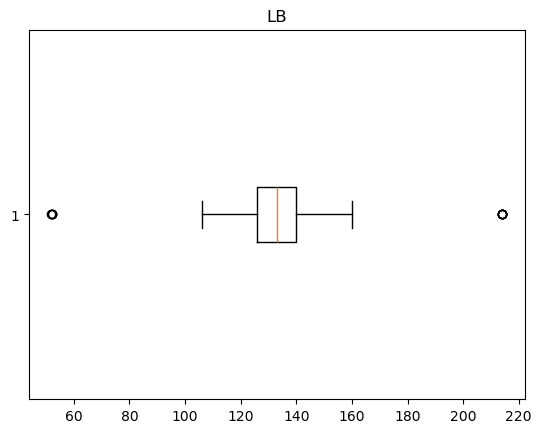

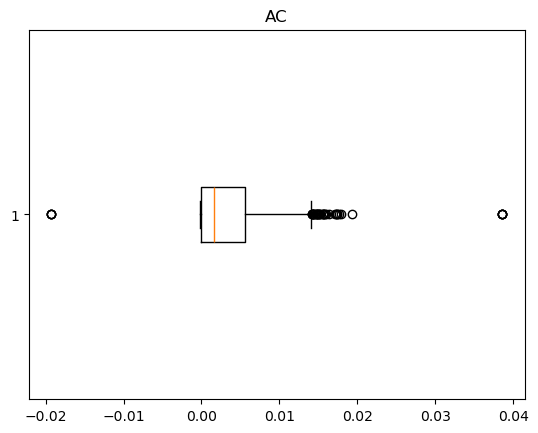

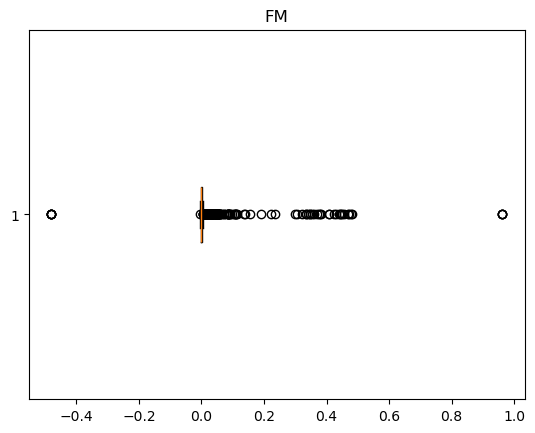

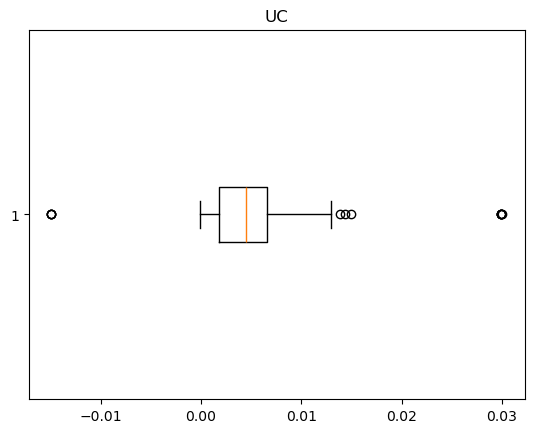

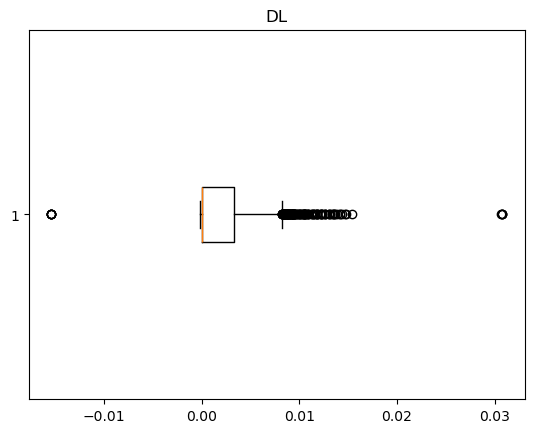

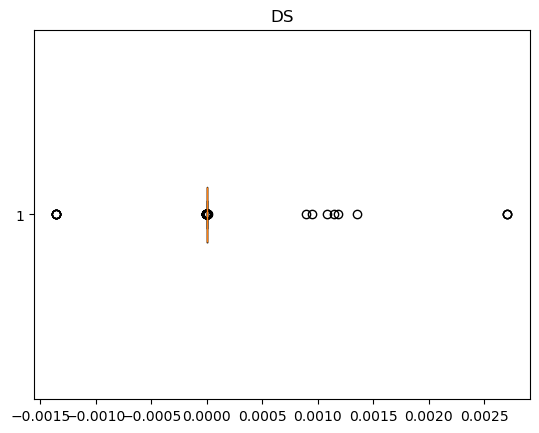

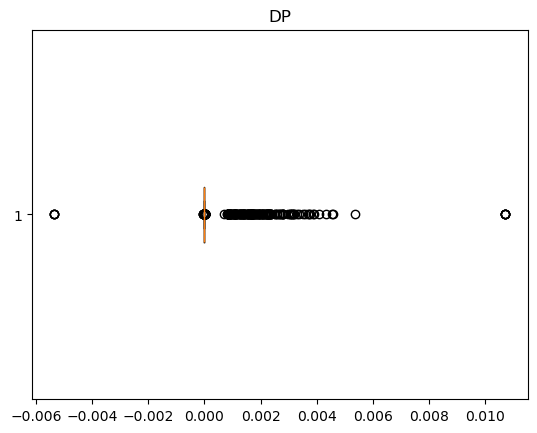

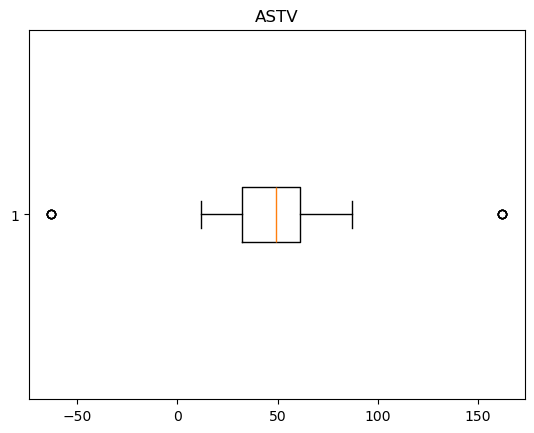

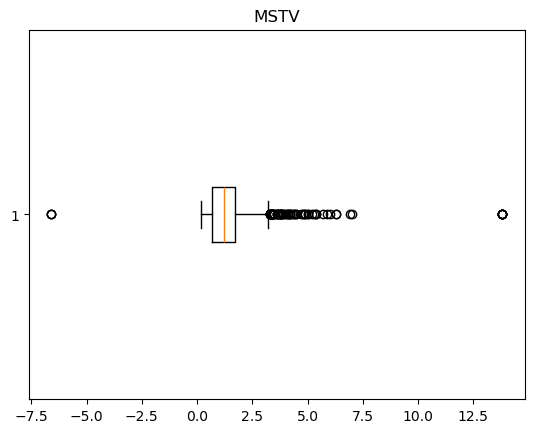

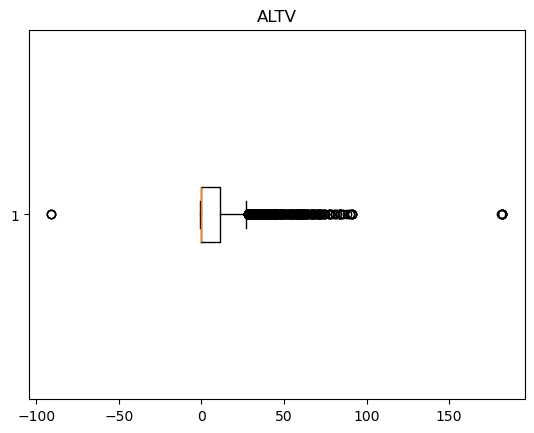

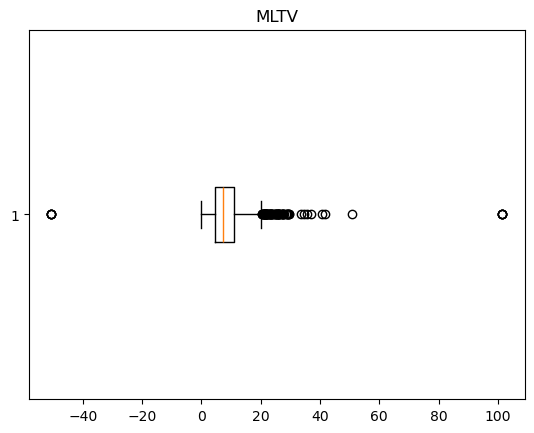

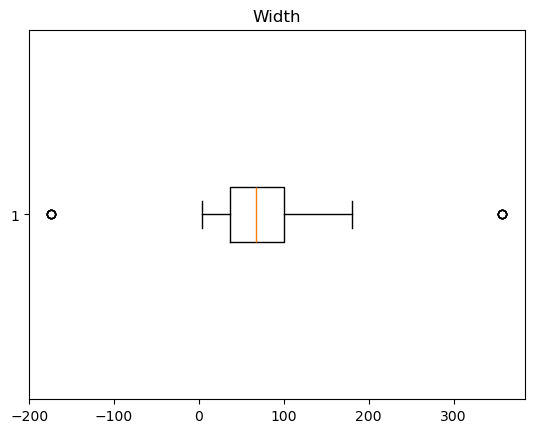

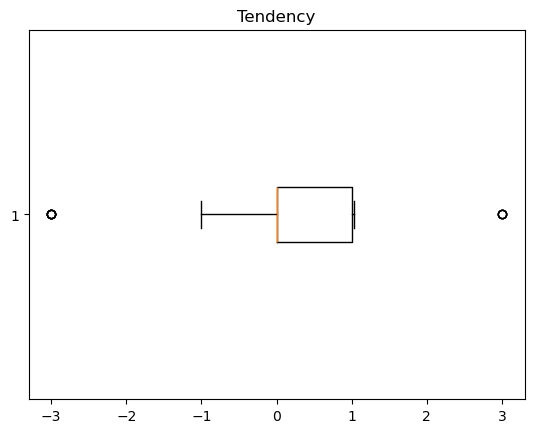

In [177]:
# Detect and treat outliers if necessary.
# To detect outliers using box plot.

num_cols = df2.select_dtypes(include = 'number').columns
num_cols = [col for col in num_cols if col != 'NSP']


for cols in num_cols:
    plt.boxplot(df2[cols], vert = False)
    plt.title(cols)
    plt.show() # Founded that outliers are existed.

In [161]:
# Outliers Treatment.

num_cols = df2.select_dtypes(include = 'number').columns
num_cols = [col for col in num_cols if col != 'NSP']

for cols in num_cols:
    Q1 = np.percentile(df2[cols], 25)
    Q3 = np.percentile(df2[cols], 75)
    
    IQR = Q3 - Q1
    UWL = Q3 + (1.5 * IQR)
    LWL = Q1 - (1.5 * IQR)

    df2[cols] = np.where(df2[cols] > UWL, UWL,
              np.where(df2[cols] < LWL, LWL, df2[cols]))

C:\Users\ptaru\AppData\Local\Temp\ipykernel_32368\2374395774.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[cols] = np.where(df2[cols] > UWL, UWL,


In [162]:
# Checking outilers after outliers treatment.

num_cols = df2.select_dtypes(include = 'number').columns
num_cols = [col for col in num_cols if col != 'NSP']

outlier_counts = {}

for col in num_cols:
    Q1 = np.percentile(df2[col], 25)
    Q3 = np.percentile(df2[col], 75)
    IQR = Q3 - Q1
    UWL = Q3 + (1.5 * IQR)
    LWL = Q1 - (1.5 * IQR)
    cnt = ((df2[col] < LWL) | (df2[col] > UWL)).sum()
    outlier_counts[col] = int(cnt)
    
pd.Series(outlier_counts).sort_values(ascending=False)

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
dtype: int64

In [163]:
# 2. Statistical Summary:

In [164]:
# Provide a statistical summary for each variable in the dataset.

df2.describe() # This function give all statistical measures including measures of central tendency and dispersion.

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.0,2105.0,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.293227,0.003143,0.001561,0.004358,0.001768,0.0,0.0,46.982677,1.302006,6.727067,8.022202,70.319997,0.319695,1.304507
std,9.979659,0.003843,0.002473,0.003008,0.002672,0.0,0.0,17.636431,0.779684,10.397529,5.094420,39.767619,0.624697,0.644619
min,105.000000,-0.008475,-0.003831,-0.005209,-0.004934,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.850000,-57.500000,-1.500000,-1.025988
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002554,0.006536,0.003289,0.0,0.0,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,161.000000,0.014124,0.006386,0.013583,0.008224,0.0,0.0,104.500000,3.200000,27.500000,20.350000,194.500000,2.500000,5.000000


In [170]:
# To find median.

for cols in df2.columns:
    print('Median for', cols, 'column:', df2[cols].median())

Median for LB column: 133.0
Median for AC column: 0.001631321
Median for FM column: 0.0
Median for UC column: 0.004484305
Median for DL column: 0.0
Median for DS column: 0.0
Median for DP column: 0.0
Median for ASTV column: 49.0
Median for MSTV column: 1.2
Median for ALTV column: 0.0
Median for MLTV column: 7.4
Median for Width column: 67.0
Median for Tendency column: 0.0
Median for NSP column: 1.0


In [166]:
# To find IQR:

for cols in df2.columns:
    Q3 = df2[cols].quantile(0.75)
    Q1 = df2[cols].quantile(0.25)
    print('IQR for', cols, 'column:', Q3 - Q1)

IQR for LB column: 14.0
IQR for AC column: 0.005649718
IQR for FM column: 0.002554278
IQR for UC column: 0.004697957
IQR for DL column: 0.003289474
IQR for DS column: 0.0
IQR for DP column: 0.0
IQR for ASTV column: 29.0
IQR for MSTV column: 1.0
IQR for ALTV column: 11.0
IQR for MLTV column: 6.300000000000001
IQR for Width column: 63.0
IQR for Tendency column: 1.0
IQR for NSP column: 0.0


In [ ]:
# Analyse

'''
If Mean and Median is equal then it is Normally Distributed. 
If Mean < Median then it is Positive Skew.
If Mean > Median then it is Negative Skew.
After seeing statistical summary, we found that some are Positive, Negative skew and some are normally distributed.
'''

In [ ]:
# 3. Data Visualization:

In [157]:
df2.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


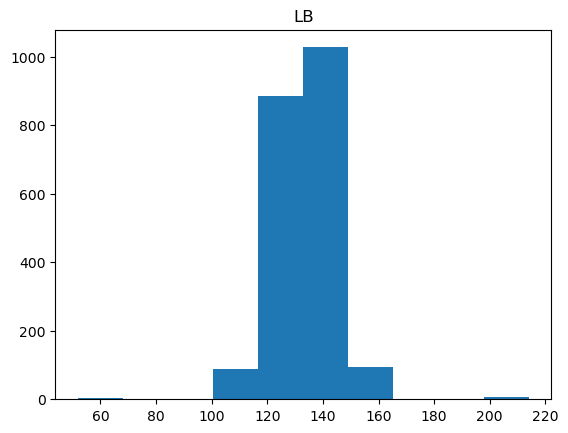

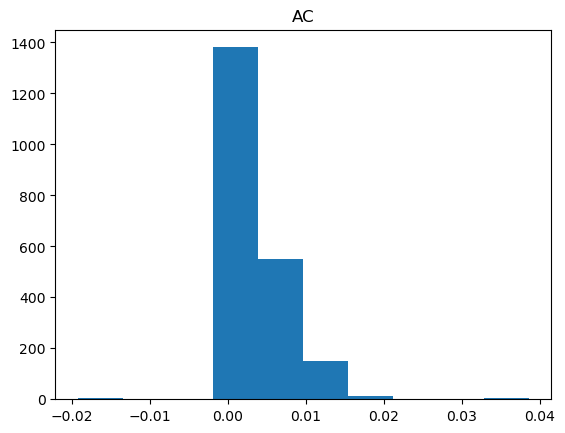

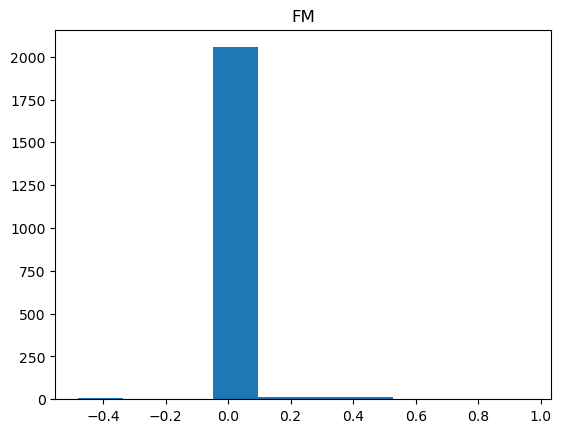

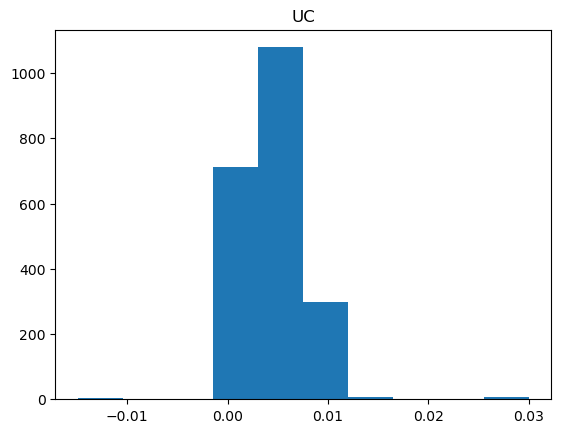

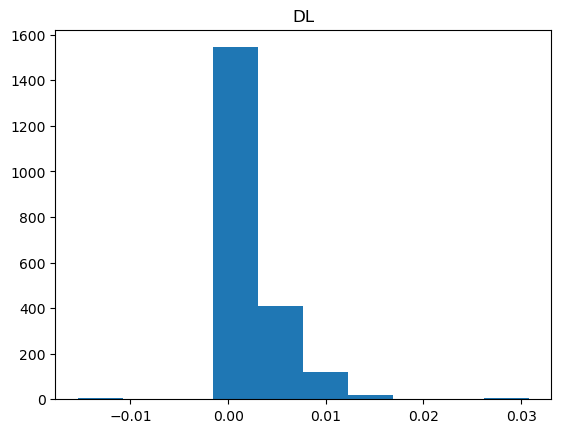

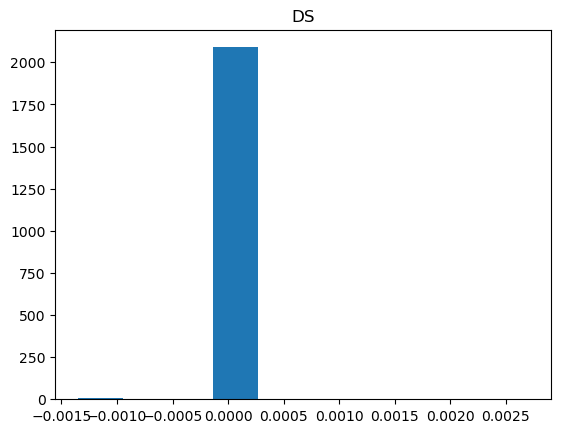

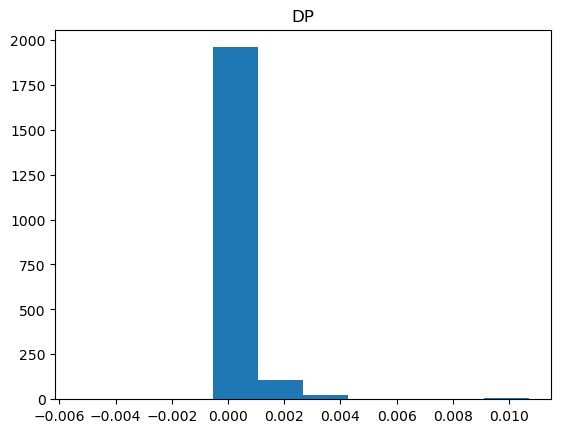

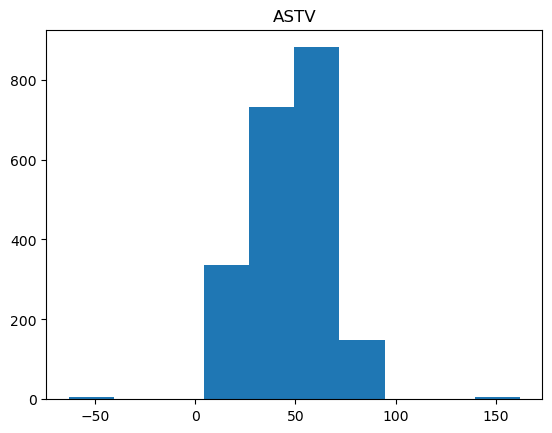

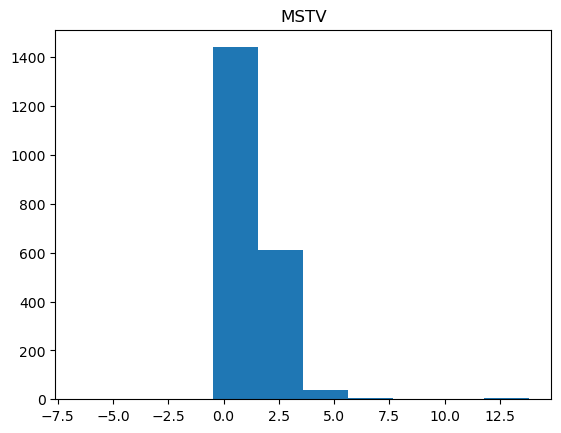

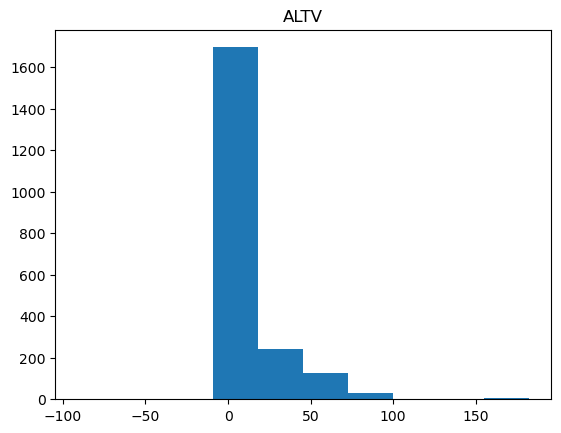

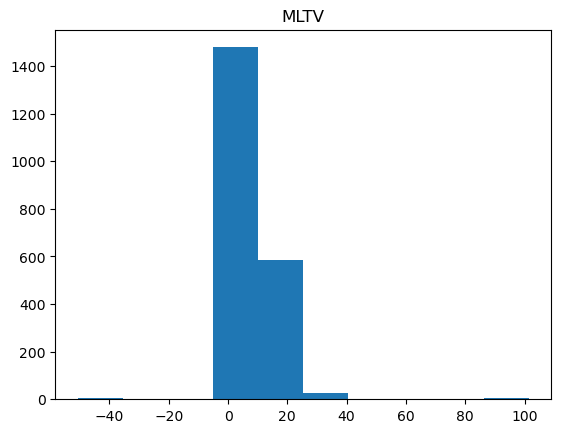

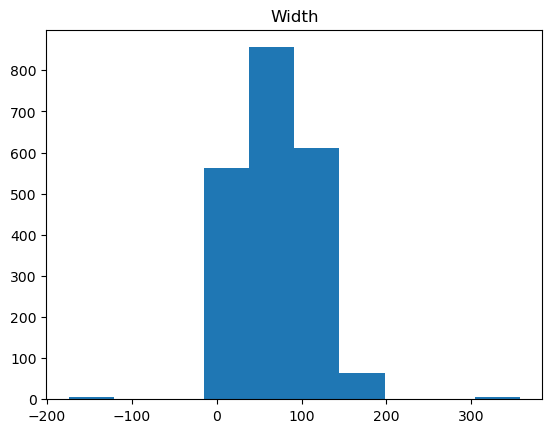

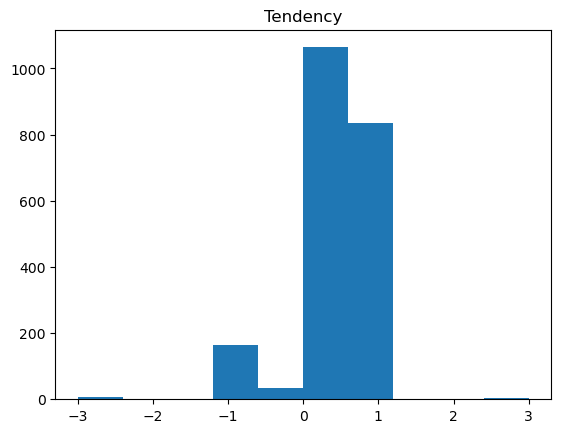

In [158]:
# Create histograms or boxplots to visualize the distributions of various numerical variables.

num_cols = df2.select_dtypes(include = 'number').columns
num_cols = [col for col in num_cols if col != 'NSP']


for cols in num_cols:
    plt.hist(df2[cols])
    plt.title(cols)
    plt.show()

In [ ]:
# Analysing distribution
'''
The LB and Width columns are Normally Distributed.
The AC, FM, UC, DL, DP, MSTV, ALTV, MLTV columns are Positively Skewed.
The DS, ASTV, Tendency columns are Negatively Skewed.
'''

In [ ]:
# Use bar charts or pie charts to display the frequency of categories for categorical variables.

'''
There are no categorical variables present in the data set. so no need to plot bar or pie charts.
'''

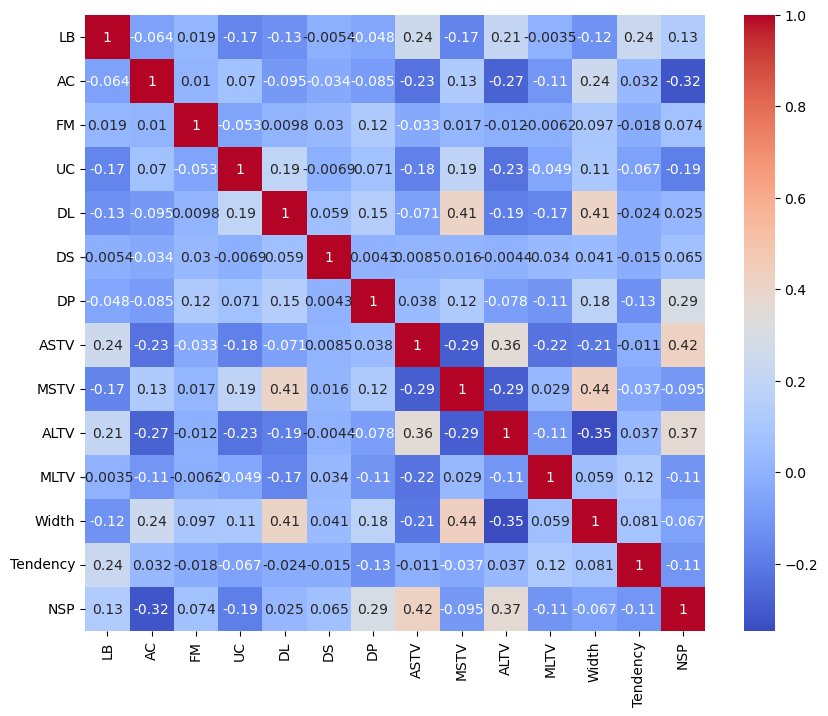

In [178]:
# Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm")
plt.show() # This heatmap shows that correlation between all variables.

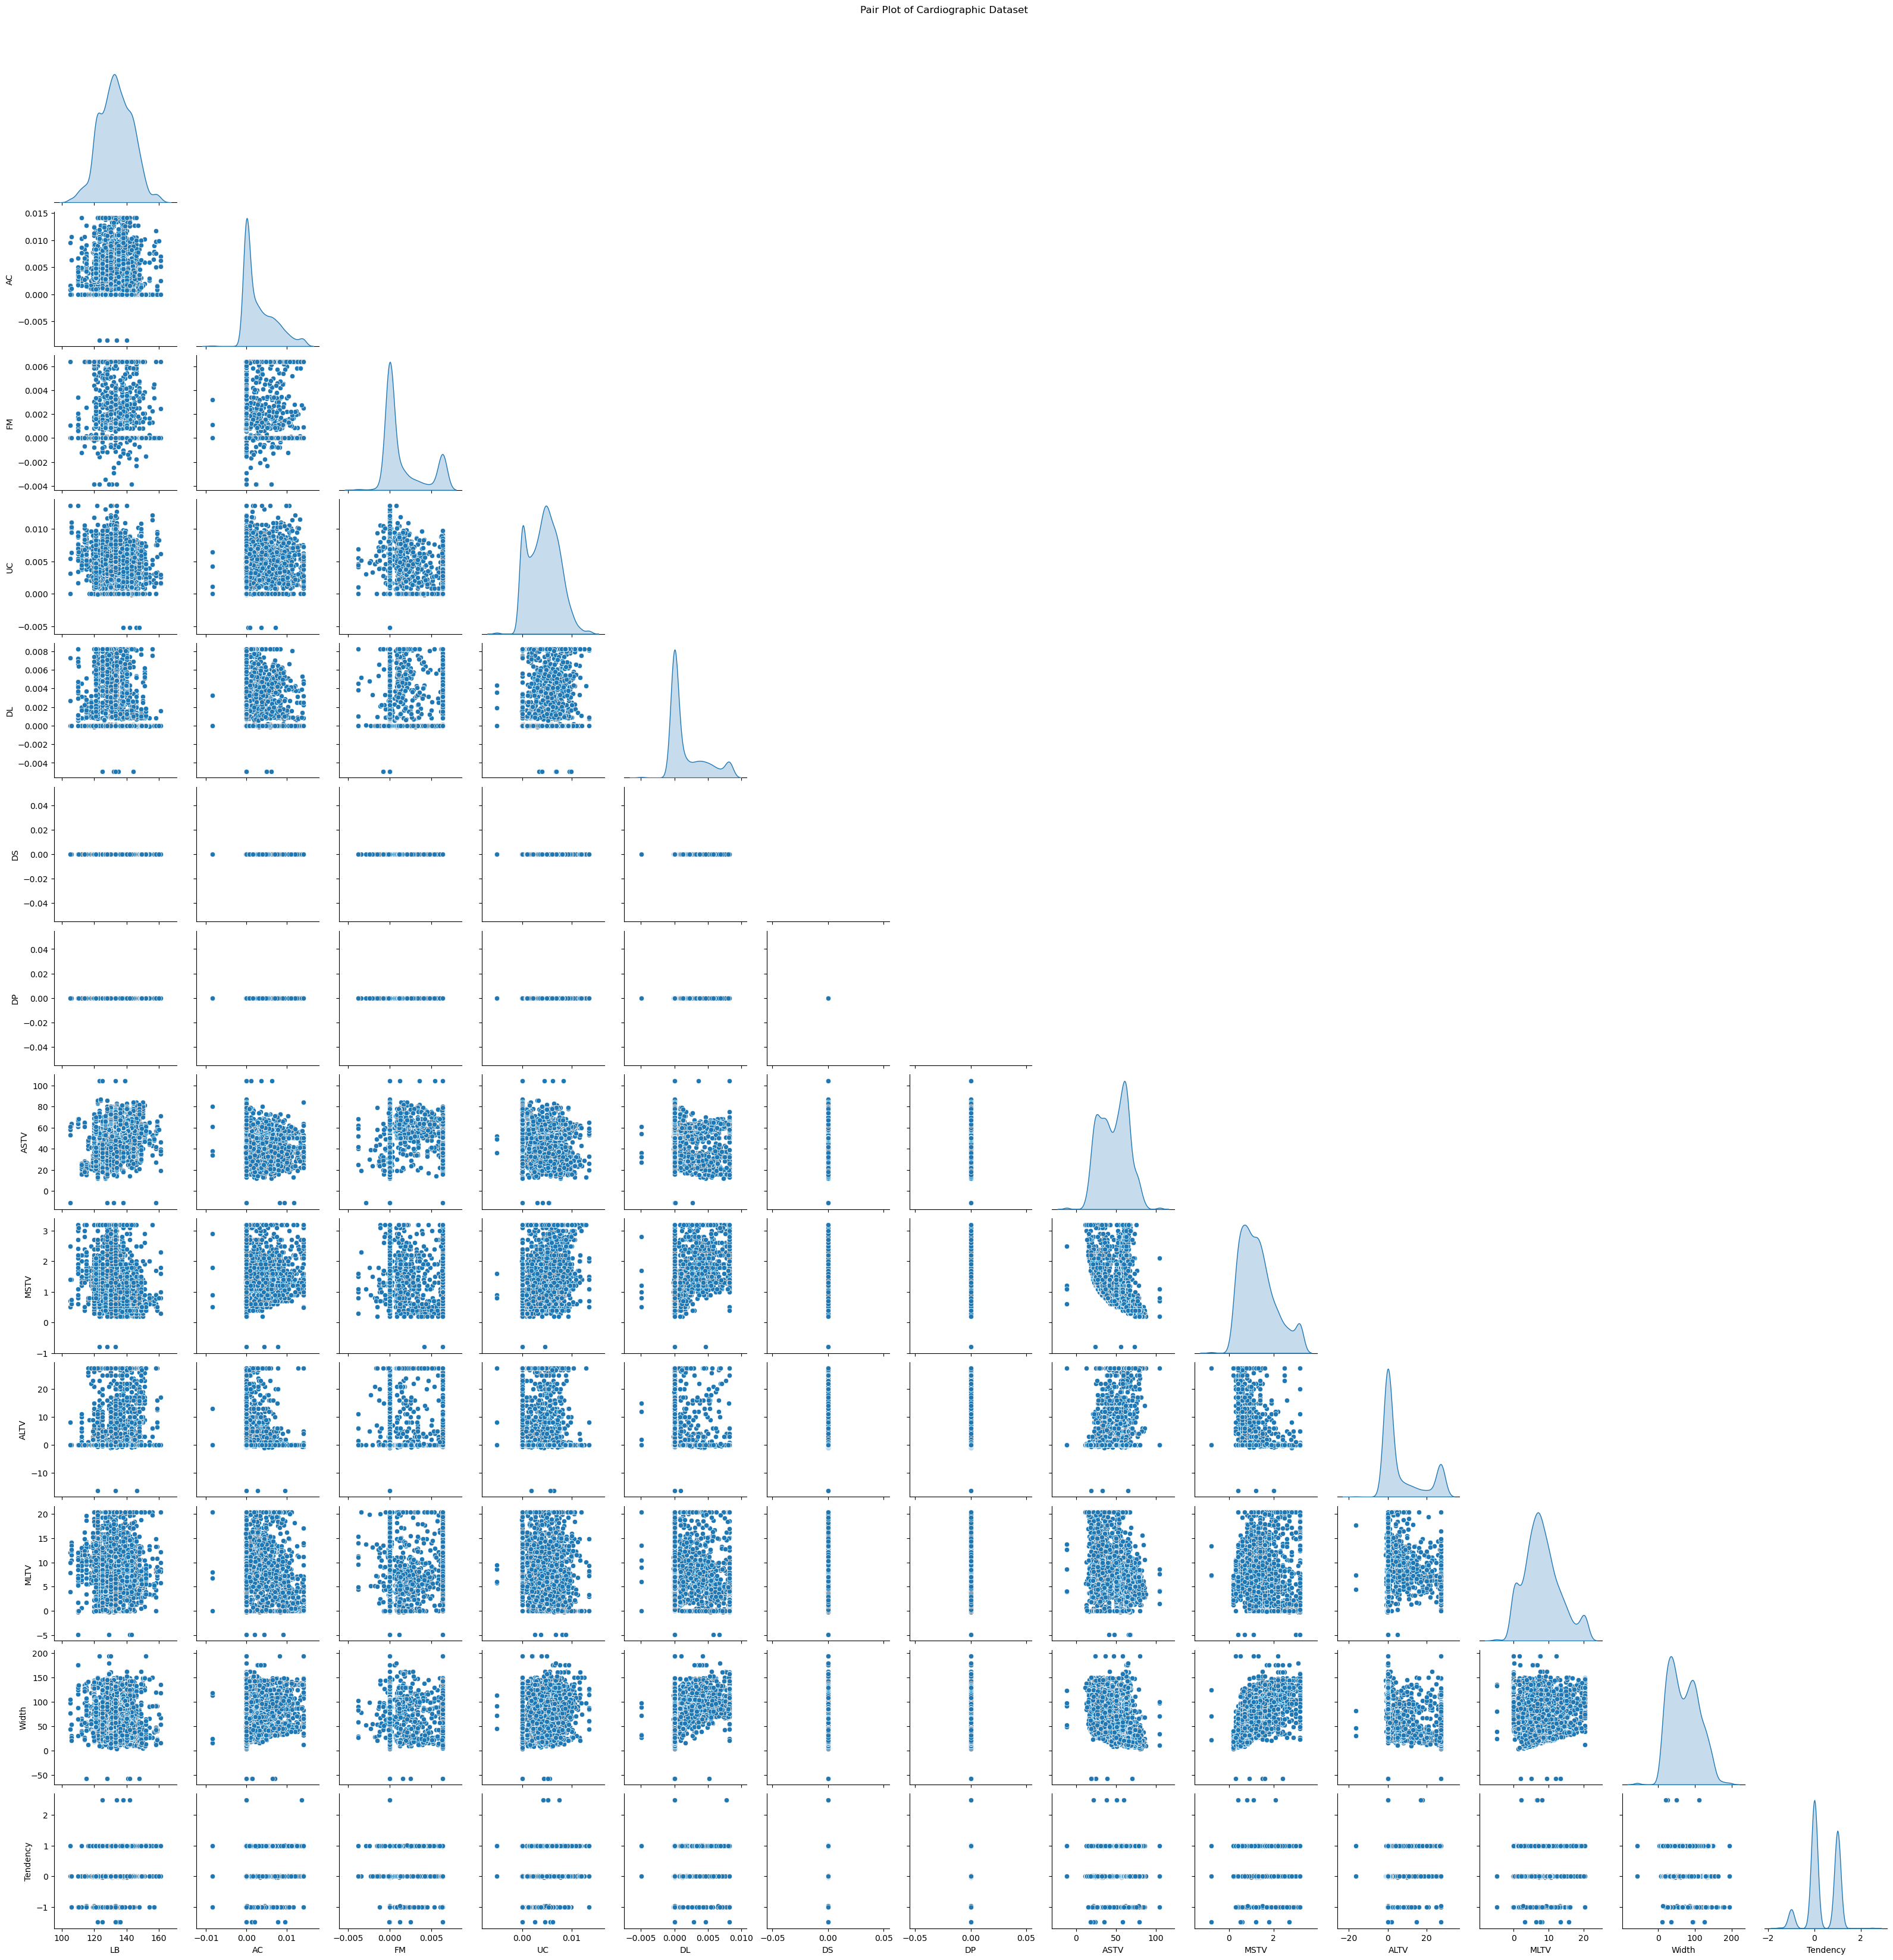

In [169]:
# Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

num_cols = df2.select_dtypes(include = 'number').columns
num_cols = [col for col in num_cols if col != 'NSP']

sns.pairplot(df2[num_cols], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Cardiographic Dataset", y=1.02)
plt.show()

4. Pattern Recognition and Insights

In [ ]:
'''
Some varaibles are highly correlated. where are some variables are 
less correlated. 
we need to drop those highly correlated x variables. 
we need to drop if x and y are less correlated to eachother.
'''